### Import modules

In [1]:
cd

/home/jovyan


In [2]:
import datacube 
from datacube.virtual import catalog_from_file
dc = datacube.Datacube()
from datacube.helpers import write_geotiff
import numpy as np
import sys


sys.path.append("Scripts")
from dea_plotting import rgb
from dea_bandindices import calculate_indices
from dea_plotting import display_map

import rasterio
import matplotlib
import xarray as xr

### Locations

Use LCCS areas

In [3]:
# # Adelaide:
# min_x= 550000
# max_x= 650000
# min_y= -3850000
# max_y= -3750000

# area_name: "LakeGairdner"
# min_x = 350000
# max_x = 400000
# min_y = -3500000
# max_y = -3450000

# area_name = "Lake_Eyre"
# min_x= 500000
# max_x= 600000
# min_y= -3000000
# max_y= -2900000

# # Diamantina:
# min_x= 800000
# max_x= 900000
# min_y= -2800000
# max_y= -2700000

# area_name = 'Gwydir'
# min_x= 1600000
# max_x= 1700000
# min_y= -3400000
# max_y= -3300000

# area_name = 'Leichhardt'
# min_x= 800000
# max_x= 900000
# min_y= -2000000
# max_y= -1900000

area_name = 'Kakadu'
min_x= 0
max_x= 100000
min_y= -1350000
max_y= -1250000

x = (min_x,max_x)
y = (min_y,max_y)
crs = "EPSG:3577"


Or use your own area defined by coordinates

In [5]:
area_name = 'Canberra'

# Set the central latitude and longitude
central_lat = -35.473508
central_lon =144.964221

# Set the buffer to load around the central coordinates
buffer = 0.2

# Compute the bounding box for the study area
study_area_lat = (central_lat - buffer, central_lat + buffer)
study_area_lon = (central_lon - buffer, central_lon + buffer)

x = study_area_lon
y = study_area_lat
crs = "EPSG:4326"

display_map(x=study_area_lon, y=study_area_lat, margin=-0.2)

/env/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/env/lib/python3.6/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/env/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: h

### Set parameters

In [6]:
res = (-100, 100)
time = ("2015-01-01", "2015-12-31")
measurements = ["blue", "green", "red", "nir", "swir1", "swir2"]

query =({'time': time,
             'x':x,
            'y':y,
            'crs':crs,
            'resolution':res,
            'measurements':measurements})

product = ['ls8_nbart_geomedian_annual']

### Load data

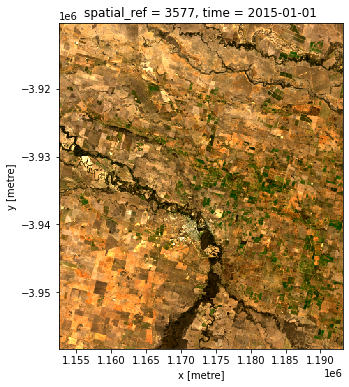

In [7]:
gm = dc.load(product=product, **query)
gm

rgb(gm,bands=['red','green','blue'])

### Calculate TCW

In [8]:
#Do tassled Cap transformation
tcw = calculate_indices(ds=gm, index='TCW', collection='ga_ls_3')

tcw

<xarray.Dataset>
Dimensions:      (time: 1, x: 407, y: 480)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-01
  * y            (y) float64 -3.91e+06 -3.91e+06 ... -3.958e+06 -3.958e+06
  * x            (x) float64 1.153e+06 1.153e+06 ... 1.193e+06 1.193e+06
    spatial_ref  int32 3577
Data variables:
    blue         (time, y, x) int16 1077 639 660 697 653 ... 689 664 655 670 695
    green        (time, y, x) int16 1654 943 929 982 923 ... 996 965 980 1026
    red          (time, y, x) int16 2129 1120 1129 1194 ... 1264 1211 1225 1295
    nir          (time, y, x) int16 3243 2511 2263 2347 ... 2329 2274 2285 2385
    swir1        (time, y, x) int16 3927 3022 2848 2916 ... 2481 2393 2413 2588
    swir2        (time, y, x) int16 3135 2022 2019 2117 ... 1850 1771 1777 1946
    TCW          (time, y, x) float64 -0.3042 -0.2334 ... -0.1764 -0.1939
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

In [9]:
tcw.TCW.squeeze()

<xarray.DataArray 'TCW' (y: 480, x: 407)>
array([[-0.30423388, -0.23336268, -0.2252277 , ..., -0.25160515,
        -0.2506397 , -0.25357917],
       [-0.25442217, -0.25212698, -0.24836501, ..., -0.25703461,
        -0.25643513, -0.27509028],
       [-0.23425365, -0.26312858, -0.26940025, ..., -0.27926475,
        -0.26886566, -0.26963418],
       ...,
       [-0.29738948, -0.29709867, -0.30068706, ..., -0.18833239,
        -0.19206586, -0.20612637],
       [-0.29863733, -0.30513948, -0.305447  , ..., -0.17584432,
        -0.18260629, -0.20906419],
       [-0.29655671, -0.28364657, -0.29169499, ..., -0.17567929,
        -0.17644701, -0.19390791]])
Coordinates:
    time         datetime64[ns] 2015-01-01
  * y            (y) float64 -3.91e+06 -3.91e+06 ... -3.958e+06 -3.958e+06
  * x            (x) float64 1.153e+06 1.153e+06 ... 1.193e+06 1.193e+06
    spatial_ref  int32 3577

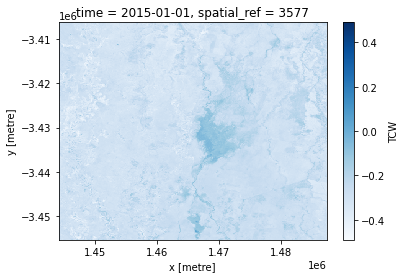

In [60]:
(tcw.TCW.squeeze()).plot.imshow(cmap='Blues')

In [44]:
# Export
dataset = tcw.TCW.squeeze().to_dataset(name='tcw')
write_geotiff('tcw.tif', dataset)

/env/lib/python3.6/site-packages/datacube/helpers.py:34: DeprecationWarning: Function datacube.helpers.write_geotiff is deprecated,
please use datacube.utils.cog.write_cog instead
  category=DeprecationWarning)


In [63]:
tcw.TCW.squeeze()

<xarray.DataArray 'TCW' (y: 492, x: 432)>
array([[-0.32173762, -0.30538943, -0.33300037, ..., -0.27737214,
        -0.32666694, -0.33751278],
       [-0.28192318, -0.20486156, -0.33144041, ..., -0.28006313,
        -0.26974999, -0.27632865],
       [-0.30809454, -0.30817665, -0.28482593, ..., -0.27384143,
        -0.26676441, -0.27954578],
       ...,
       [-0.27245225, -0.31845875, -0.29501884, ..., -0.30813602,
        -0.30025028, -0.29380034],
       [-0.31040462, -0.304334  , -0.31276993, ..., -0.30805994,
        -0.28866553, -0.28582595],
       [-0.28299388, -0.2962132 , -0.3096574 , ..., -0.26668203,
        -0.28422929, -0.29076776]])
Coordinates:
    time         datetime64[ns] 2015-01-01
  * y            (y) float64 -3.406e+06 -3.406e+06 ... -3.455e+06 -3.455e+06
  * x            (x) float64 1.444e+06 1.444e+06 ... 1.487e+06 1.487e+06
    spatial_ref  int32 3577

In [65]:
from affine import Affine
da = xr.open_rasterio('rice_binary.tif')
transform = Affine.from_gdal(*da.attrs['transform'])
nx, ny = da.sizes['x'], da.sizes['y']
x, y = np.meshgrid(np.arange(nx)+0.5, np.arange(ny)+0.5) * transform

RasterioIOError: rice_binary.tif: No such file or directory

In [66]:
with rasterio.open('dev/dea-notebooks/Gabrielle_dev/LCCS_wet_veg/rice_binary.tif') as f:
    im = f.read()

In [13]:
im.squeeze().shape

(3919, 4660)

In [16]:
ima = xr.DataArray(im.squeeze(),dims=['x','y'])

In [18]:
ima

<xarray.DataArray (x: 3919, y: 4660)>
array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
Dimensions without coordinates: x, y